In [23]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [24]:
#imports for keras layers
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ZeroPadding2D
from keras.optimizers import SGD

In [25]:
train,test = keras.datasets.mnist.load_data()

Sample images: 


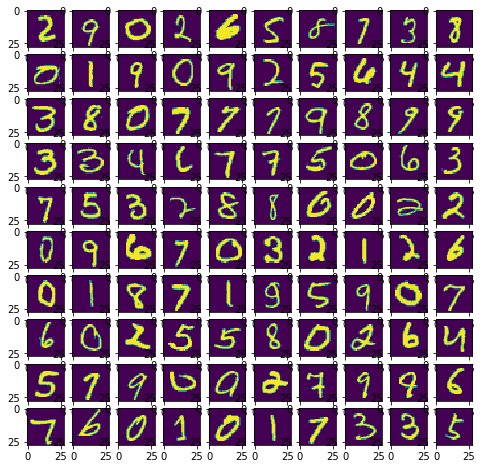

In [26]:
fig = plt.figure(figsize=(8,8))
rows = 10
cols = 10

for i in range(100):
        fig.add_subplot(rows, cols, i+1)
        image = random.choice(train[0])
        plt.imshow(image)
print("Sample images: ")
plt.show()

In [27]:
#resize data
x_train = train[0]
y_train = train[1]
x_test = test[0]
y_test = test[1]

IMAGE_SIZE = len(train[0][0])

def create_z(y, max_Val):
    z = []
    
    for item in y:
        if item >= max_Val/2:
            z.append(1)
        else:
            z.append(0)
    return np.asarray(z)

#takes in a y matrix and a size of one-hots,
# outputs converted matrix
def convert_to_onehot(y, size):
    y_out = []
    
    for item in y:
        new_row = np.zeros((size))
        new_row[item] = 1
        y_out.append(new_row)
    
    return np.asarray(y_out)

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
    
z_train = create_z(y_train, 10)
z_test = create_z(y_test, 10)
    
y_train = convert_to_onehot(y_train,10)
y_test = convert_to_onehot(y_test,10)

In [28]:
#define a neural network in keras
def build_model():
    image_input = Input(shape=(IMAGE_SIZE,IMAGE_SIZE,1))
    secondary_input = Input(shape=(1,))
    x = ZeroPadding2D((1,1))(image_input)
    x = Conv2D(64, (3,3), activation="relu")(x)
    x = Flatten()(x)
    combined = keras.layers.concatenate([x, secondary_input], axis=1)
    layer_1 = Dense(64, activation="relu")(combined)
    d_1 = Dropout(.5)(layer_1)
    layer_2 = Dense(64, activation="relu")(d_1)
    main_output = Dense(10, activation="softmax")(layer_2)
    model = Model(inputs=[image_input, secondary_input], outputs=[main_output])
    return model


In [29]:
model = build_model()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 30, 30, 1)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 64)   640         zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 50176)        0           conv2d_3[0][0]                   
____________________________________________________________________________________________

In [30]:
#compile the model for training
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
#and fit
model.fit([x_train, z_train], y_train, epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 64s 1ms/step - loss: 2.0308 - accuracy: 0.3040
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.8475 - accuracy: 0.7058
Epoch 3/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.3414 - accuracy: 0.9024
Epoch 4/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2463 - accuracy: 0.9290
Epoch 5/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2026 - accuracy: 0.9423
Epoch 6/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1760 - accuracy: 0.9490
Epoch 7/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1564 - accuracy: 0.9546
Epoch 8/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1441 - accuracy: 0.9587
Epoch 9/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1314 - accuracy: 0.9620
Epoch 10/10
60000/60000 [==============================

In [33]:
y_hat = model.predict([x_test, z_test])

In [34]:
#test Classify accuracy
def test_classify(y_hat, y_test):
    count = 0
    right = 0
    for i in range(len(y_test)):
        if np.argmax(y_test[i]) == np.argmax(y_hat[i]):
            right+=1
        count += 1
    return(right/count)

In [35]:
print(test_classify(y_hat, y_test))

0.9772


In [36]:
model.evaluate([x_test,z_test], y_test)

10000/10000 [==============================] - 2s 217us/step


[0.0846319490339607, 0.9771999716758728]